In [2]:
import numpy as np
import pickle
import sys
import random

sys.path.append('../')
from riskrrt import RiskRRT
from utils import *

%load_ext autoreload
%autoreload 2


In [7]:
from os import listdir
from os.path import isfile, join
mypath = '../results/dataset/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [9]:
!ls ../results/dataset

bi_traj_A_crowds_zara010.pkl  bi_traj_B_crowds_zara0254.pkl
bi_traj_A_crowds_zara011.pkl  bi_traj_B_crowds_zara0255.pkl
bi_traj_A_crowds_zara0110.pkl bi_traj_B_crowds_zara0256.pkl
bi_traj_A_crowds_zara0111.pkl bi_traj_B_crowds_zara0257.pkl
bi_traj_A_crowds_zara0112.pkl bi_traj_B_crowds_zara0258.pkl
bi_traj_A_crowds_zara0113.pkl bi_traj_B_crowds_zara0259.pkl
bi_traj_A_crowds_zara0114.pkl bi_traj_B_crowds_zara026.pkl
bi_traj_A_crowds_zara0115.pkl bi_traj_B_crowds_zara0260.pkl
bi_traj_A_crowds_zara0116.pkl bi_traj_B_crowds_zara0261.pkl
bi_traj_A_crowds_zara0117.pkl bi_traj_B_crowds_zara0262.pkl
bi_traj_A_crowds_zara0118.pkl bi_traj_B_crowds_zara0263.pkl
bi_traj_A_crowds_zara0119.pkl bi_traj_B_crowds_zara0264.pkl
bi_traj_A_crowds_zara012.pkl  bi_traj_B_crowds_zara0265.pkl
bi_traj_A_crowds_zara0120.pkl bi_traj_B_crowds_zara0266.pkl
bi_traj_A_crowds_zara0121.pkl bi_traj_B_crowds_zara0267.pkl
bi_traj_A_crowds_zara0122.pkl bi_traj_B_crowds_zara0268.pkl
bi_traj_A_crowds_zara0123.pkl bi_traj_B_c

In [10]:
trajfile = '../results/dataset/bi_traj_B_crowds_zara030.pkl'
with open(trajfile,'rb') as f:
    data1 = pickle.load(f)

In [11]:

data_name = 'crowds_'+trajfile.split('/')[-1].split('_')[-1][:6]
data_name

'crowds_zara03'

In [12]:
timeStep = 0.4
data_path = '/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/data/' + data_name

trajReader = TrajReader(data_name, timeStep, full_traj_path = data_path)

crowds_zara03


In [13]:

traj = [] # x, y, theta, vel
actions = [] # x, y, angular velocity
pedestrians = []

for n in data1:
    traj.append( [n.pose.x, n.pose.y, n.pose.theta, n.vel] )
    actions.append( [n.vel.linear.x_vel, n.vel.linear.y_vel, n.vel.angular] )
    
    ped_poses = trajReader.get_traj(n.time)
    
    peds = []
    for ped_pose in ped_poses:
        ped_idx = ped_pose[0]
        #print(ped_idx)
        temp_pose_x = ped_pose[1] + trajReader.scale.offset_x
        temp_pose_y = ped_pose[2] + trajReader.scale.offset_y
        peds.append((ped_idx, temp_pose_x,temp_pose_y))
        #cv2.circle(curr_frame, (ped_grid_i, ped_grid_j), radius=8, color=[255, 140, 0], thickness=-1)
    
    pedestrians.append(peds)

In [14]:
len(pedestrians), len(traj), len(actions)

(67, 67, 67)

In [15]:
scene = {'pedestrians':pedestrians, 'traj':traj, 'actions': actions}

In [16]:

data_path = '/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/data/'

trajReader01 = TrajReader('crowds_zara01', timeStep, full_traj_path = data_path+'crowds_zara01')
trajReader02 = TrajReader('crowds_zara02', timeStep, full_traj_path = data_path+'crowds_zara02')
trajReader03 = TrajReader('crowds_zara03', timeStep, full_traj_path = data_path+'crowds_zara03')



crowds_zara01
crowds_zara02
crowds_zara03


In [6]:
data1[0]

In [20]:


def make_scene_data(fname):
    
    trajfile = '../results/dataset/' + fname
    with open(trajfile,'rb') as f:
        data1 = pickle.load(f)
    
    
    data_name = 'crowds_'+trajfile.split('/')[-1].split('_')[-1][:6]
    assert(data_name in ['crowds_zara01', 'crowds_zara02', 'crowds_zara03'])
    if data_name == 'crowds_zara01':
        trajReader = trajReader01
    elif data_name == 'crowds_zara02':
        trajReader = trajReader02
    elif data_name == 'crowds_zara03':
        trajReader = trajReader03
    
    traj = [] # x, y, theta, vel
    actions = [] # x, y, angular velocity
    pedestrians = []

    map_resolution = 0.054 # meter/pixel
    map_name = fname.split('_')[2]

    for n in data1:
        traj.append( [n.pose.x, n.pose.y, n.pose.theta, n.vel] )
        actions.append( [n.vel.linear.x_vel, n.vel.linear.y_vel, n.vel.angular] )

        ped_poses = trajReader.get_traj(n.time)

        peds = []
        for ped_pose in ped_poses:
            ped_idx = ped_pose[0]
            #print(ped_idx)
            temp_pose_x = ped_pose[1] + trajReader.scale.offset_x
            temp_pose_y = ped_pose[2] + trajReader.scale.offset_y
            peds.append((ped_idx, temp_pose_x,temp_pose_y))
            #cv2.circle(curr_frame, (ped_grid_i, ped_grid_j), radius=8, color=[255, 140, 0], thickness=-1)

        pedestrians.append(peds)
        
    scene = {'pedestrians':pedestrians, 'traj':traj, 'actions': actions, 
             'ogmap': map_name, 'fname':fname}
    return scene

In [21]:
from tqdm import tqdm

scenes = []

for f in tqdm(onlyfiles):
    s = make_scene_data(f)
    scenes.append(s)


100%|████████████████████████████████████████████████████████████████| 900/900 [09:11<00:00,  1.63it/s]


In [22]:
with open('../results/imitation_dataset/all_scenes.pkl', 'wb') as f:
    pickle.dump(scenes, f)

# OG map data

In [7]:
timeStep = 0.4
data_path = '/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/data/' + data_name

trajReader = TrajReader(data_name, timeStep, full_traj_path = data_path)

crowds_zara03


In [11]:
ls /Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/maps/

A.png      B.png      C.png      blank.png  map.png    map_.png


In [19]:

map_resolution = 0.054 # meter/pixel
map_name = 'B'
map_path = os.path.join('/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/', 'maps', map_name + '.png')
map_im = cv2.imread(map_path)



In [29]:
ogmap = OccupancyGrid(map_im, map_resolution)


traj = [] # x, y, theta, vel
traj_map = []
actions = [] # x, y, angular velocity
ogmaps = []

for n in data1:
    traj.append( [n.pose.x, n.pose.y, n.pose.theta, n.vel] )
    actions.append( [n.vel.linear.x_vel, n.vel.linear.y_vel, n.vel.angular] )
    
    traj_map.append([ogmap.gridIFromPose(n.pose), ogmap.gridJFromPose(n.pose)])
    
    ped_poses = trajReader.get_traj(n.time)
    trajReader.update_ogmap(ogmap, n.time)
    ogmaps.append(ogmap.grid.copy())
    
    
    #plt.imshow(ogmap.grid.reshape((500,500)))


In [40]:


def make_ogmap_data(fname):
    
    trajfile = '../results/dataset/' + fname
    with open(trajfile,'rb') as f:
        data1 = pickle.load(f)
    
    data_name = 'crowds_'+trajfile.split('/')[-1].split('_')[-1][:6]
    assert(data_name in ['crowds_zara01', 'crowds_zara02', 'crowds_zara03'])
    if data_name == 'crowds_zara01':
        trajReader = trajReader01
    elif data_name == 'crowds_zara02':
        trajReader = trajReader02
    elif data_name == 'crowds_zara03':
        trajReader = trajReader03
        
    map_resolution = 0.054 # meter/pixel
    map_name = fname.split('_')[2]
    map_path = os.path.join('/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/', 'maps', map_name + '.png')
    map_im = cv2.imread(map_path)

    ogmap = OccupancyGrid(map_im, map_resolution)


    traj = [] # x, y, theta, vel
    traj_map = []
    actions = [] # x, y, angular velocity
    ogmaps = []

    for n in data1:
        traj.append( [n.pose.x, n.pose.y, n.pose.theta, n.vel] )
        actions.append( [n.vel.linear.x_vel, n.vel.linear.y_vel, n.vel.angular] )

        traj_map.append([ogmap.gridIFromPose(n.pose), ogmap.gridJFromPose(n.pose)])

        ped_poses = trajReader.get_traj(n.time)
        trajReader.update_ogmap(ogmap, n.time)
        ogmaps.append(ogmap.grid.copy())


    scene = {'ogmaps':ogmaps, 'traj':traj, 'actions': actions}
    return scene

In [41]:
from tqdm import tqdm

scenes = []

for f in tqdm(onlyfiles):
    s = make_ogmap_data(f)
    scenes.append(s)


100%|████████████████████████████████████████████████████████████████| 900/900 [09:44<00:00,  1.54it/s]


In [ ]:
with open('../results/imitation_dataset/all_ogmap_scenes.pkl', 'wb') as f:
    pickle.dump(scenes, f)

In [17]:
ogmap

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

n_peds = max(max([[a[0] for a in time] for time in pedestrians]))+1
cmap = mpl.colormaps['rainbow']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_peds))

fig, ax = plt.subplots(layout='constrained')

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)

plt.show()

NameError: name 'pedestrians' is not defined

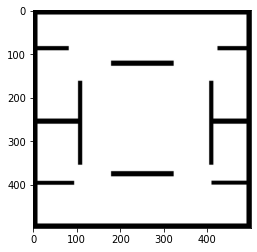

In [215]:
from utils import OccupancyGrid

map_path = '../maps/B.png'
mapp = cv2.imread(map_path)

map_resolution = 0.054 # meter/pixel

ogmap = OccupancyGrid(mapp, map_resolution)


plt.imshow(mapp) 

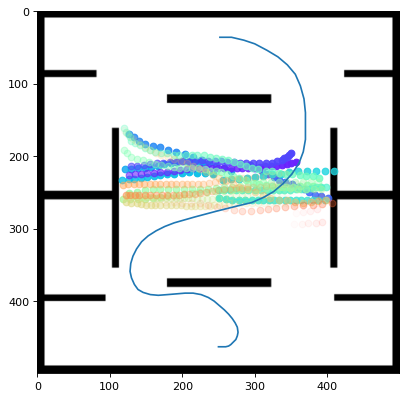

In [216]:
def getI(x, ogmap = ogmap):
        return abs(int(round((x + ogmap.origin_offset_x) / ogmap.resolution)))

def getJ(y, ogmap = ogmap):
        return abs(int(round((y + ogmap.origin_offset_y) / ogmap.resolution)))
    
    
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot([getI(a[0]) for a in traj], [getJ(a[1])  for a in traj])

for t, data in enumerate(pedestrians):
    for pos in data:
        plt.scatter(getI(pos[1]) , getJ(pos[2]), color = colors[pos[0]] , alpha = 1.0-t/len(traj))
        
plt.imshow(mapp) 


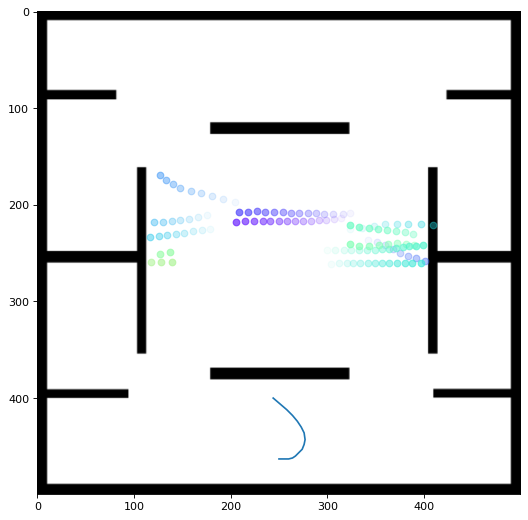

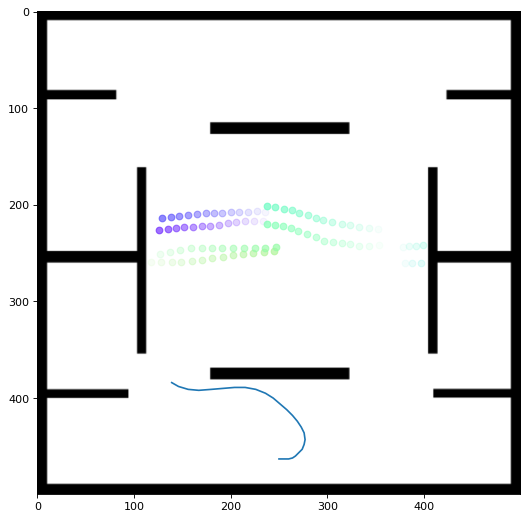

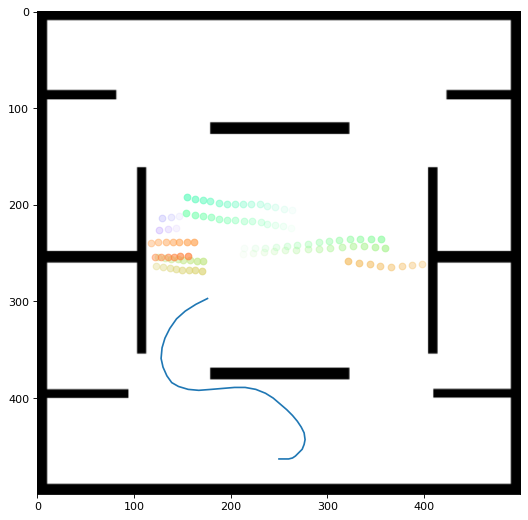

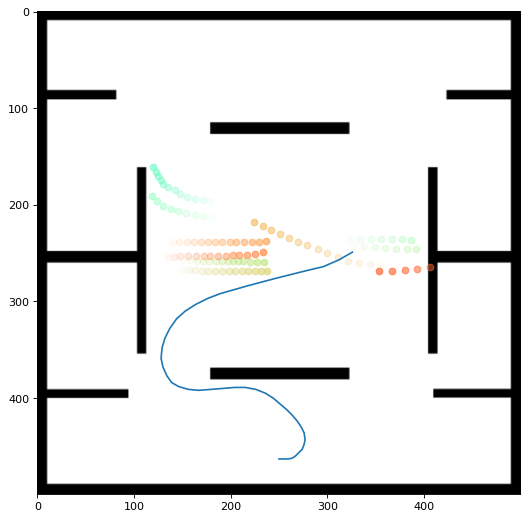

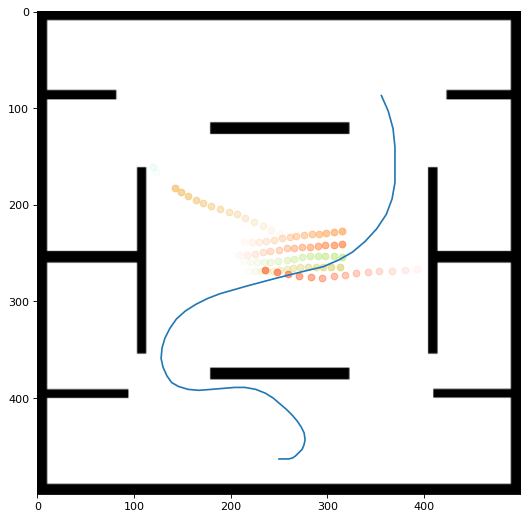

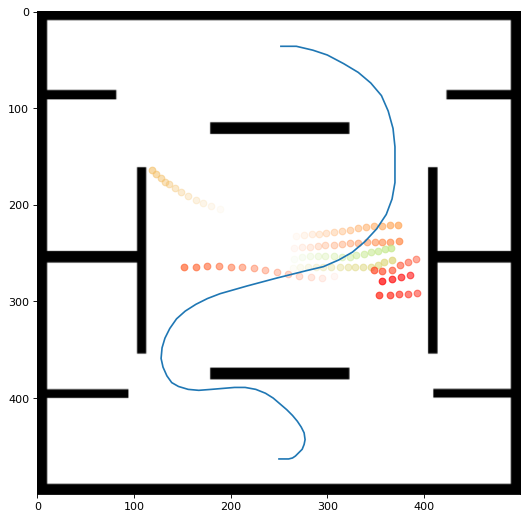

In [219]:
for timerange in list(range(20, len(traj), 10))+[len(traj)]:
    
    figure(figsize=(8, 8), dpi=80)

    plt.plot([getI(a[0]) for a in traj[:timerange]], [getJ(a[1])  for a in traj[:timerange]])

    for t, data in enumerate(pedestrians[timerange-15:timerange]):
        for pos in data:
            plt.scatter(getI(pos[1]) , getJ(pos[2]), color = colors[pos[0]] , alpha = t/20.0)

    plt.imshow(mapp) 

In [225]:
trajnp = np.array(traj)
trajnp.shape

total_len = 0
for i in range(trajnp.shape[0]-1):
    total_len += np.linalg.norm(trajnp[i+1, [0,1]] - trajnp[i, [0,1]])

In [226]:
total_len

41.63513534565345

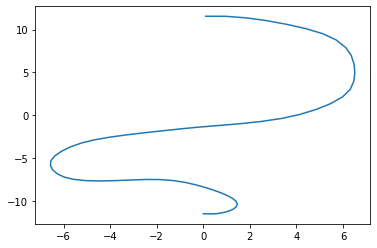

In [218]:
plt.plot([a[0] for a in traj], [a[1] for a in traj])

In [56]:
from biriskrrt import BiRiskRRT, BiRiskRRTPed, TrajReader
from param import BiParams
from utils import OccupancyGrid, generateSimulationVideo
import cv2
import time
import numpy as np
import os
import pickle


In [40]:
data_name = '../../data/crowds_zara03'

a = os.path.join(os.getcwd(), 'data/{}/'.format(data_name))
a 

'/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/notebooks/data/../../data/crowds_zara03/'

In [73]:
# from params
timeStep = 0.4
data_name = 'zara03'
data_path = '/Users/sophiasun/Desktop/2cool4school/phd/robotics_project/BiRiskRRT/data/crowds_' + data_name

traj_others = TrajReader(data_name, timeStep, full_traj_path = data_path)

zara03


In [74]:
t = 0
traj_ls = []
while t < 35:
    a = traj_others.get_traj(t)
    traj_ls.append(a)
    t += timeStep

In [75]:
len(traj_ls)

88

In [76]:
pot = (3,4,45,6)
a,_ = pot
a

ValueError: too many values to unpack (expected 2)

In [ ]:
#num agents
agents = []
for i in traj_ls:
    for ag, x, y, _, _, _ in i:
        if ag not in agents:
            agnets.append(ag)
        else

In [63]:
#id, x, y, theta, x_vel, y_vel
#id, x, y, theta, w, h, uncertainty

traj_ls[0]


[[1,
  array(12.77523215),
  array(7.27912389),
  array(0.),
  array(-0.88921509),
  array(-0.20584408)],
 [2,
  array(12.37534845),
  array(7.92350535),
  array(0.),
  array(-0.3914651),
  array(-0.33651032)],
 [3,
  array(9.38674389),
  array(7.06433007),
  array(0.),
  array(1.05232555),
  array(-0.5966495)],
 [4,
  array(7.89244161),
  array(6.53927851),
  array(0.),
  array(-1.32540403),
  array(0.57457347)],
 [5,
  array(5.766744),
  array(7.18365997),
  array(0.),
  array(-1.16071508),
  array(0.1229098)],
 [6,
  array(6.58755793),
  array(6.41994861),
  array(0.),
  array(-1.47641274),
  array(0.07696779)],
 [7,
  array(7.32418581),
  array(5.91876303),
  array(0.),
  array(1.53060751),
  array(0.12648969)],
 [8,
  array(7.02953466),
  array(4.58226815),
  array(0.),
  array(1.26279066),
  array(-0.13663274)],
 [9,
  array(7.02953466),
  array(5.17891765),
  array(0.),
  array(1.06547962),
  array(0.)]]

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [33]:
# do we consider actions?
actions

[[0.0, 0.0, 0.0],
 [0.06666666666666665, 0.0, 0.12],
 [0.1333333333333333, 0.0, 0.07999999999999999],
 [0.19999999999999996, 0.0, 0.03999999999999998],
 [0.2666666666666666, 0.0, 0.15999999999999998],
 [0.33333333333333326, 0.0, 0.27999999999999997],
 [0.3999999999999999, 0.0, 0.07999999999999996],
 [0.46666666666666656, 0.0, -0.04000000000000005],
 [0.5333333333333332, 0.0, 0.07999999999999996],
 [0.5999999999999999, 0.0, 0.19999999999999996],
 [0.6666666666666665, 0.0, 0.23999999999999994],
 [0.7333333333333332, 0.0, 0.35999999999999993],
 [0.7999999999999998, 0.0, 0.3999999999999999],
 [0.8666666666666665, 0.0, 0.1999999999999999],
 [0.9333333333333331, 0.0, -1.1102230246251565e-16],
 [0.9999999999999998, 0.0, -0.04000000000000012],
 [1.0666666666666664, 0.0, -0.16000000000000014],
 [1.133333333333333, 0.0, -0.04000000000000015],
 [1.1999999999999997, 0.0, 0.07999999999999985],
 [1.2666666666666664, 0.0, -0.12000000000000016],
 [1.333333333333333, 0.0, -1.6653345369377348e-16],
 [1.

In [23]:
traj

[[0.0, -11.5, 0.0, <utils.Twist at 0x106191af0>],
 [0.026656427846249955,
  -11.499360122870563,
  0.048,
 [0.07987830092278789,
  -11.495949264763238,
  0.07999999999999999,
 [0.15956789074100963,
  -11.488918422535217,
  0.09599999999999997,
 [0.2653438818767245, -11.475304665066236, 0.16, <utils.Twist at 0x13e279ee0>],
 [0.3955108308286218, -11.44674302569883, 0.272, <utils.Twist at 0x13e2830d0>],
 [0.548914503504889, -11.401299338011063, 0.304, <utils.Twist at 0x13e283dc0>],
 [0.7274613048268734, -11.34684990421853, 0.288, <utils.Twist at 0x13e28b0d0>],
 [0.9310039307529332,
  -11.28299360413797,
  0.3199999999999999,
 [1.1555592758305315,
  -11.198470331899301,
  0.3999999999999999,
 [1.395817720301835,
  -11.083004343779585,
  0.49599999999999994,
 [1.642877840576797,
  -10.925342809640615,
  0.6399999999999999,
 [1.8831991396510583,
  -10.71456471256636,
  0.7999999999999997,
 [2.114524554315327,
  -10.456490596922492,
  0.8799999999999996,
 [2.3523943148161304,
  -10.1687480821

In [7]:
data1[0].vel.linear.x_vel
data1[0].vel.linear.y_vel
data1[0].vel.angular


NameError: name 'data1' is not defined